In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

from numpy import argmax
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import gridspec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle_jsons"
%cd /content/drive/MyDrive/kaggle_jsons

Mounted at /content/drive/
/content/drive/MyDrive/kaggle_jsons


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/kaggle_jsons/creditcard.csv")

We'll use the same preprocessing from the Logistic Regression
 model

---



In [ ]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing 
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

In [ ]:
#the data set is unblanced so we use a preprocessing technique called under sampling to balance the dataset 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
xData, yData = rus.fit_resample(xData, yData)

print('original dataset shape:', Counter(yData))
print('Resample dataset shape', Counter(yData))

original dataset shape: Counter({0: 492, 1: 492})
Resample dataset shape Counter({0: 492, 1: 492})


In [ ]:
# our features are floats and a sclaing should help us about that.
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(xData)

StandardScaler()

In [ ]:
xData = scaler.transform(xData)

In [ ]:
#shuffling the data for randomization 
from sklearn.utils import shuffle
xData, yData = shuffle(xData, yData)

In [ ]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)


In [ ]:
xTrain.shape


(787, 30)

In [ ]:
from sklearn.svm import SVC
 
# Building a Support Vector Machine on train data
svc_model  = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(xTrain, yTrain)


SVC(C=0.1, gamma=1, kernel='linear')

In [ ]:
prediction = svc_model .predict(xTest)
# check the accuracy on the training set
print(svc_model.score(xTrain, yTrain))
print(svc_model.score(xTest, yTest))
  

0.9428208386277002
0.9289340101522843


In [ ]:
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
n_errors = (prediction != yTest).sum()
print("The model used is Logestic regression classifier")
  
acc = accuracy_score(yTest, prediction)
print("The accuracy is {}".format(acc))
  
prec = precision_score(yTest, prediction)
print("The precision is {}".format(prec))
  
rec = recall_score(yTest, prediction)
print("The recall is {}".format(rec))
  
f1 = f1_score(yTest, prediction)
print("The F1-Score is {}".format(f1))
  
MCC = matthews_corrcoef(yTest, prediction)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Logestic regression classifier
The accuracy is 0.9289340101522843
The precision is 1.0
The recall is 0.8585858585858586
The F1-Score is 0.9239130434782609
The Matthews correlation coefficient is0.8667540748462774


In [ ]:
#Roc curve 
#prediction probablitlies true positives , false positives 


#values of the worst case scenario 
r_probs = [0 for _ in range(len(yTest))]

#contains the values of predictions using the logestic regression model 
sv_probs = svc_model.predict(xTest)

In [ ]:
#calculating auroc curve
r_auc = roc_auc_score(yTest, r_probs)
sv_auc = roc_auc_score(yTest,sv_probs) 

In [ ]:
print('svm AUROC =  %.3f' % (sv_auc))
print('worst case  AUROC =  %.3f' % (r_auc))

svm AUROC =  0.929
worst case  AUROC =  0.500


In [ ]:
#calculate ROC curve 
#false positive array, true positive array 
r_fpr, r_tpr, _ = roc_curve(yTest, r_probs)
sv_fpr, sv_tpr, _ = roc_curve(yTest, sv_probs)


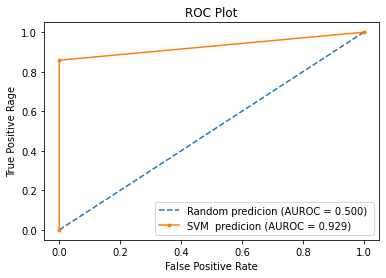

In [ ]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random predicion (AUROC = %0.3f) ' % r_auc)
plt.plot(sv_fpr, sv_tpr, marker='.', label='SVM  predicion (AUROC = %0.3f) ' % sv_auc)
#title 
plt.title('ROC Plot')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rage')
plt.legend()
plt.show()


In [ ]:
confusion_matrix(yTest, prediction)

array([[98,  0],
       [14, 85]])